Load Julia packages (libraries) needed

### snippet 0.5 is replaced by below `using StatisticalRethinking`.

In [1]:
using StatisticalRethinking, GLM
gr(size=(500, 500));

### snippet 0.4

Below `dataset(...)` provides access to often used R datasets.
If this is not a common R dataset, see the chapter 4 snippets.

In [2]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
first(df, 5)

,height,weight,age,male
,Float64,Float64,Float64,Int64
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Fit a linear regression of distance on speed

In [3]:
m = lm(@formula(height ~ weight), df)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: height ~ 1 + weight

Coefficients:
───────────────────────────────────────────────────
             Estimate  Std.Error  t value  Pr(>|t|)
───────────────────────────────────────────────────
(Intercept)   75.4359  1.05174    71.7249    <1e-99
weight         1.7643  0.0272984  64.6301    <1e-99
───────────────────────────────────────────────────

estimated coefficients from the model

In [4]:
coef(m)

2-element Array{Float64,1}:
 75.43590571030104  
  1.7642965739107388

Plot residuals against speed

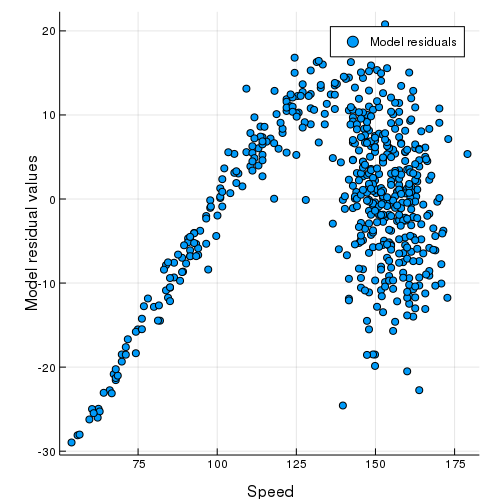

In [5]:
scatter( df[:height], residuals(m), xlab="Speed",
ylab="Model residual values", lab="Model residuals")

End of `00/clip-04-05.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*